In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_lg')

In [2]:
with open(r'data\fitzgerald\fitzgerald_gatsby.txt', 'r') as f:
    fg_text = f.read()

gatsby_nlp = nlp(fg_text)

with open(r'data\hemingway\hemingway_sun_also.txt', 'r') as f:
    sun_text = f.read()

sun_nlp = nlp(sun_text)

In [3]:
print(len(list(gatsby_nlp.sents)))
print(len(list(sun_nlp.sents)))

2894
6994


In [4]:
tagDict = {w.pos: w.pos_ for w in gatsby_nlp}

In [5]:
extendedTagDict = {w.pos: w.pos_ + "_" + w.tag_ for w in gatsby_nlp}

In [6]:
gatsby_POS = pd.Series(gatsby_nlp.count_by(spacy.attrs.POS))/len(gatsby_nlp)
sun_POS = pd.Series(sun_nlp.count_by(spacy.attrs.POS))/len(sun_nlp)

Text(0.5, 1.0, 'All the Different Kinds of Parts of Speech')

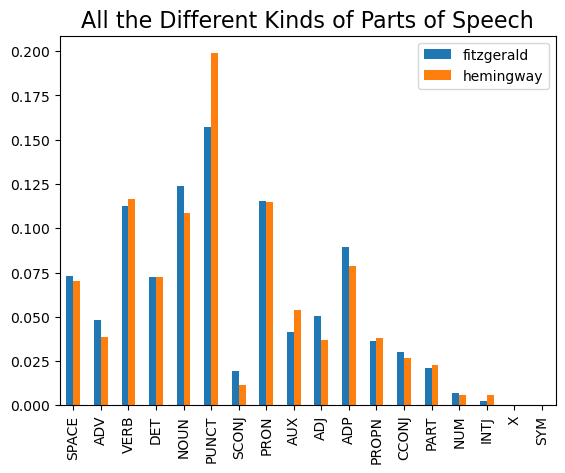

In [7]:
df = pd.DataFrame([gatsby_POS, sun_POS], index=['fitzgerald', 'hemingway'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')
plt.title('All the Different Kinds of Parts of Speech', fontsize=16)

Text(0.5, 1.0, 'All the Different Kinds of Parts of Speech')

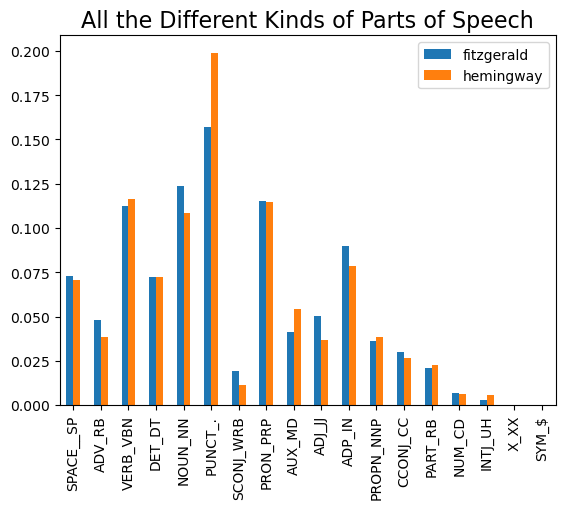

In [8]:
df = pd.DataFrame([gatsby_POS, sun_POS], index=['fitzgerald', 'hemingway'])
df.columns = [extendedTagDict[column] for column in df.columns]
df.T.plot(kind='bar')
plt.title('All the Different Kinds of Parts of Speech', fontsize=16)

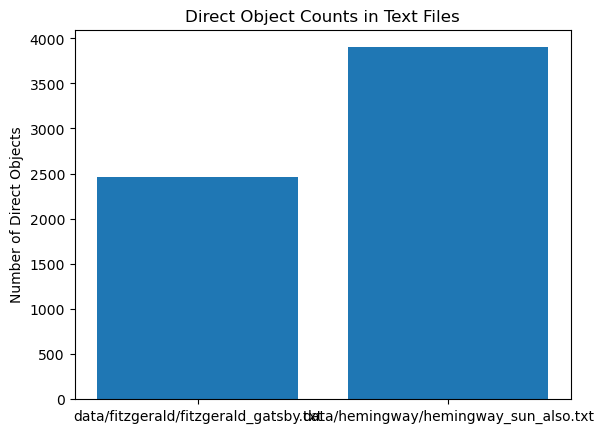

In [9]:
file_names = [
    'data/fitzgerald/fitzgerald_gatsby.txt',
    'data/hemingway/hemingway_sun_also.txt'
]

# List to store the number of direct objects for each text file
direct_object_counts = []

# Loop over the file names
for file_name in file_names:
    # Open the text file and read its content
    with open(file_name, "r") as file:
        text = file.read()

    # Process the text using spaCy
    doc = nlp(text)

    # Initialize a counter for direct objects
    direct_object_count = 0

    # Iterate over the parsed sentences in the text
    for sent in doc.sents:
        # Iterate over the tokens in the sentence
        for token in sent:
            # Check if the token is a direct object
            if token.dep_ == "dobj":
                # Increment the counter
                direct_object_count += 1

    # Append the number of direct objects found to the list
    direct_object_counts.append(direct_object_count)

# Plot the results using a bar plot
x = range(len(file_names))
plt.bar(x, direct_object_counts)
plt.xticks(x, file_names)
plt.ylabel("Number of Direct Objects")
plt.title("Direct Object Counts in Text Files")
plt.show()


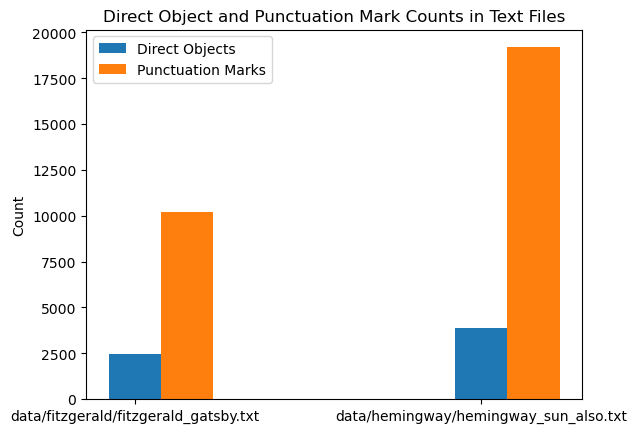

In [10]:
direct_object_counts = []
punct_counts = []

for file_name in file_names:
    # Open the text file and read its content
    with open(file_name, "r") as file:
        text = file.read()

    # Process the text using spaCy
    doc = nlp(text)

    # Initialize a counter for direct objects
    direct_object_count = 0
    punct_count = 0

    # Iterate over the parsed sentences in the text
    for sent in doc.sents:
        # Iterate over the tokens in the sentence
        for token in sent:
            # Check if the token is a direct object
            if token.dep_ == "dobj":
                # Increment the counter
                direct_object_count += 1
            elif token.pos_ == "PUNCT":
                punct_count += 1

    # Append the number of direct objects found to the list
    direct_object_counts.append(direct_object_count)
    punct_counts.append(punct_count)

x = range(len(file_names))
bar_width = 0.15
plt.bar(x, direct_object_counts, bar_width, label="Direct Objects")
plt.bar([i + bar_width for i in x], punct_counts, bar_width, label="Punctuation Marks")
plt.xticks(x, file_names)
plt.ylabel("Count")
plt.title("Direct Object and Punctuation Mark Counts in Text Files")
plt.legend()
plt.show()

In [11]:
import csv
import os

root_folder = 'data'
filenames = []
direct_object_counts = []
punct_counts = []

for subfolder in os.listdir(root_folder):
    subfolder_path = os.path.join(root_folder, subfolder)
    
    for file in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, file)
        print("Processing file:", file)
        with open(file_path, 'r', encoding="utf-8") as f:
            text = f.read()
        filename_cut = file_path.split("\\")[2].split(".")[0]
        filenames.append(filename_cut)
        
        # Process the text using spaCy
        print("Converting to spaCy doc format:", file)
        doc = nlp(text)

        # Initialize a counter for direct objects
        direct_object_count = 0
        punct_count = 0

        # Iterate over the parsed sentences in the text
        for sent in doc.sents:
            # Iterate over the tokens in the sentence
            for token in sent:
                # Check if the token is a direct object
                if token.dep_ == "dobj":
                    # Increment the counter
                    direct_object_count += 1
                elif token.pos_ == "PUNCT":
                    punct_count += 1

    # Append the number of direct objects found to the list
        direct_object_counts.append(direct_object_count)
        punct_counts.append(punct_count)

Processing file: fitzgerald_all_the_sad.txt
Converting to spaCy doc format: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Converting to spaCy doc format: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Converting to spaCy doc format: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Converting to spaCy doc format: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_gatsby.txt
Converting to spaCy doc format: fitzgerald_gatsby.txt
Processing file: fitzgerald_tales_jazz_age.txt
Converting to spaCy doc format: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_tender_is.txt
Converting to spaCy doc format: fitzgerald_tender_is.txt
Processing file: fitzgerald_the_vegtable.txt
Converting to spaCy doc format: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_this_side.txt
Converting to spaCy doc format: fitzgerald_this_side.txt
Processing file: hemingwa

ValueError: [E088] Text of length 1398249 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [ ]:
# Categorize each text based on author
author_category = []
for filename in filenames:
    if "fitzgerald" in filename.lower():
        author_category.append("Fitzgerald")
    elif "hemingway" in filename.lower():
        author_category.append("Hemingway")
    else:
        author_category.append("Other")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Plot the direct object counts for each text
for i, filename in enumerate(filenames):
    if author_category[i] == "Fitzgerald":
        color = "red"
    elif author_category[i] == "Hemingway":
        color = "blue"
    else:
        color = "gray"
    ax1.bar(filename, direct_object_counts[i], color=color)
ax1.set_xticklabels(filenames, rotation=90)
ax1.set_title("Direct Object Counts by Author")

# Plot the punctuation counts for each text
for i, filename in enumerate(filenames):
    if author_category[i] == "Fitzgerald":
        color = "red"
    elif author_category[i] == "Hemingway":
        color = "blue"
    else:
        color = "gray"
    ax2.bar(filename, punct_counts[i], color=color)
ax2.set_xticklabels(filenames, rotation=90)
ax2.set_title("Punctuation Counts by Author")

In [ ]:
import matplotlib.pyplot as plt

# Categorize each text based on author
author_category = []
for filename in filenames:
    if "fitzgerald" in filename.lower():
        author_category.append("Fitzgerald")
    elif "hemingway" in filename.lower():
        author_category.append("Hemingway")
    else:
        author_category.append("Other")

# Plot the direct object counts for each text
fig, ax = plt.subplots()
for i, filename in enumerate(filenames):
    if author_category[i] == "Fitzgerald":
        color = "red"
    elif author_category[i] == "Hemingway":
        color = "blue"
    else:
        color = "gray"
    ax.bar(filename, direct_object_counts[i], color=color)
ax.set_xticklabels(filenames, rotation=90)
ax.set_title("Direct Object Counts by Author")

# Plot the punctuation counts for each text
fig, ax = plt.subplots()
for i, filename in enumerate(filenames):
    if author_category[i] == "Fitzgerald":
        color = "red"
    elif author_category[i] == "Hemingway":
        color = "blue"
    else:
        color = "gray"
    ax.bar(filename, punct_counts[i], color=color)
ax.set_xticklabels(filenames, rotation=90)
ax.set_title("Punctuation Counts by Author")


In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

def count_chars(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_capital_words(text):
    return sum(map(str.isupper,text.split()))

def count_sent(text):
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    return len(set(text.split()))

def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

def preprocess(sent):
    sent = sent.lower() # lower case
    sent = re.sub('\s+', ' ', sent) #remove double spacing
    sent = re.sub('([0-9]+)', '', sent) # remove numbers
    sent_token_list = [word for word in sent.split(' ')]
    sent = ' '.join(sent_token_list)
    return sent

In [ ]:
import os
from helper_functions import load_data
import pandas as pd

text_data, labels = load_data('data')

df = pd.DataFrame(list(zip(text_data, labels)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df['text_data'] = df['text_data'].apply(lambda x: preprocess(x))
df['text_data'] = df['text_data'].apply(lambda x: preprocess(x))

# No feature engineering whatsoever ...:

In [ ]:
train, test = train_test_split(df, test_size=0.2)
train.head()

In [ ]:
vectorizer = TfidfVectorizer()
train_final_features = vectorizer.fit_transform(train['text_data']).toarray()
test_final_features = vectorizer.transform(test['text_data']).toarray()
print(train_final_features.shape)
print(test_final_features.shape)

In [ ]:
train_tf_idf = pd.DataFrame(train_final_features)
test_tf_idf = pd.DataFrame(test_final_features)

In [ ]:
train_label = train['label']
test_label = test['label']

In [ ]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(train_tf_idf, train_label, test_size = 0.2)
ytest = np.array(test_label)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_tf_idf, train_label ,test_size=0.2)
_RandomForestClassifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, random_state = 42)
_RandomForestClassifier.fit(X_train, y_train)
_RandomForestClassifier_prediction = _RandomForestClassifier.predict(X_test)
val_RandomForestClassifier_prediction = _RandomForestClassifier.predict(test_tf_idf)
print("Accuracy => ", round(accuracy_score(_RandomForestClassifier_prediction, y_test)*100, 2))
print("\nRandom Forest Classifier results: \n")
print(classification_report(y_test, _RandomForestClassifier_prediction, target_names = ['fitzgerald', 'hemingway']))
print("Validation Accuracy => ", round(accuracy_score(val_RandomForestClassifier_prediction, ytest)*100, 2))
print("\nValidation Random Forest Classifier results: \n")
print(classification_report(ytest, val_RandomForestClassifier_prediction, target_names = ['fitzgerald', 'hemingway']))

# With Feature Engineering:

In [ ]:
import os
from helper_functions import load_data
import pandas as pd

text_data, labels = load_data('data')

df = pd.DataFrame(list(zip(text_data, labels)))

In [ ]:
train, test = train_test_split(df, test_size=0.2)

In [ ]:
train.head()

In [ ]:
train = train.rename(columns={0: "text_data", 1: "label"})
test = test.rename(columns={0: "text_data", 1: "label"})

In [ ]:
train.head()

In [ ]:
for idx, row in train.iterrows():
    train.loc[idx, 'chars'] = count_chars(row['text_data'])
    train.loc[idx, 'words'] = count_words(row['text_data'])
    train.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    train.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    train.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    train.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])

for idx, row in test.iterrows():
    test.loc[idx, 'chars'] = count_chars(row['text_data'])
    test.loc[idx, 'words'] = count_words(row['text_data'])
    test.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    test.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    test.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    test.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])

In [ ]:
vectorizer = TfidfVectorizer()
train_tf_idf_features = vectorizer.fit_transform(train['text_data']).toarray()
test_tf_idf_features = vectorizer.transform(test['text_data']).toarray()
print(train_tf_idf_features.shape)
print(test_tf_idf_features.shape)

In [ ]:
train_tf_idf = pd.DataFrame(train_tf_idf_features)
test_tf_idf = pd.DataFrame(test_tf_idf_features)
features = ['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count']
train_Y = train['label']
test_Y = test['label']

In [ ]:
train = pd.merge(train_tf_idf, train[features], left_index=True, right_index=True)
test = pd.merge(test_tf_idf, test[features], left_index=True, right_index=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, train_Y, test_size=0.2, random_state = 42)# Random Forest Classifier
_RandomForestClassifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, random_state = 42)
_RandomForestClassifier.fit(X_train, y_train)
_RandomForestClassifier_prediction = _RandomForestClassifier.predict(X_test)
val_RandomForestClassifier_prediction = _RandomForestClassifier.predict(test)
print("Accuracy => ", round(accuracy_score(_RandomForestClassifier_prediction, y_test)*100, 2))
print("\nRandom Forest Classifier results: \n")
print(classification_report(y_test, _RandomForestClassifier_prediction, target_names = ['fitzgerald', 'hemingway']))
print("Validation Accuracy => ", round(accuracy_score(val_RandomForestClassifier_prediction, test_Y)*100, 2))
print("\nValidation Random Forest Classifier results: \n")
print(classification_report(test_Y, val_RandomForestClassifier_prediction, target_names = ['fitzgerald', 'hemingway']))